## Step 1: Synthetic Data Pre-Processing

Generate a synthetic dataset by concatenating character images from [notMNIST][notMNIST] or [MNIST][MNIST]. You might, for example limit yourself to sequences up to five digits. 

Considerations:
- If you use sequences with up to five digits you would then use five classifiers on top of your deep network. You would have to incorporate an additional ‘blank’ character to account for shorter number sequences.
- Your labels should be one-hot encoded
- Your input data should be standardized
- You may want to include subsets of your data to use while your write the code for your neural network

[notMNIST]: http://yaroslavvb.blogspot.com/2011/09/notmnist-dataset.html
[MNIST]: http://yann.lecun.com/exdb/mnist/

#### This will set the current working directory for the kernel being run by this notebook at the root of your project so that you can import code from `lib`

**NOTE:** Make sure not to run this more than once. 

In [1]:
from os import chdir; chdir('..')

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

from lib.data import pickle_data_dictionary
from lib.retrieval import maybe_download, maybe_extract, maybe_pickle
from lib.preprocess import instantiate_datasets, make_synthetic_datasets 

Using TensorFlow backend.


### Retrieve the notMNIST dataset and pickle for local use

Use the predefined functions included in the `lib.retrieval` module to import the data you will use.

In [3]:
train_filename = maybe_download('data/notMNIST_large.tar.gz', 247336696)
train_folders = maybe_extract(train_filename)
notmnist_datasets = maybe_pickle(train_folders, 45000)

('Found and verified', 'data/notMNIST_large.tar.gz')
data/notMNIST_large already present - Skipping extraction of data/notMNIST_large.tar.gz.
['data/notMNIST_large/A', 'data/notMNIST_large/B', 'data/notMNIST_large/C', 'data/notMNIST_large/D', 'data/notMNIST_large/E', 'data/notMNIST_large/F', 'data/notMNIST_large/G', 'data/notMNIST_large/H', 'data/notMNIST_large/I', 'data/notMNIST_large/J']
data/notMNIST_large/A.pickle already present - Skipping pickling.
data/notMNIST_large/B.pickle already present - Skipping pickling.
data/notMNIST_large/C.pickle already present - Skipping pickling.
data/notMNIST_large/D.pickle already present - Skipping pickling.
data/notMNIST_large/E.pickle already present - Skipping pickling.
data/notMNIST_large/F.pickle already present - Skipping pickling.
data/notMNIST_large/G.pickle already present - Skipping pickling.
data/notMNIST_large/H.pickle already present - Skipping pickling.
data/notMNIST_large/I.pickle already present - Skipping pickling.
data/notMNIST

### Make Synthetic Dataset and Pickle for Local Use

Define code in the `lib.preprocess` module that will return a data dictionary containing your synthetic dataset. You should have a training set, a validation set, and a testing set.

In [4]:
train_set, valid_set, test_set = instantiate_datasets()
data_dictionary = make_synthetic_datasets(train_set, valid_set, test_set, notmnist_datasets)

loading data:  . . . . . . . . . . 
shuffle data
make dataset:  . . .
reshape data for cnn:  . . .
one-hot encode labels:  . . .


### Prepare a few plots of samples of your Synthetic Dataset

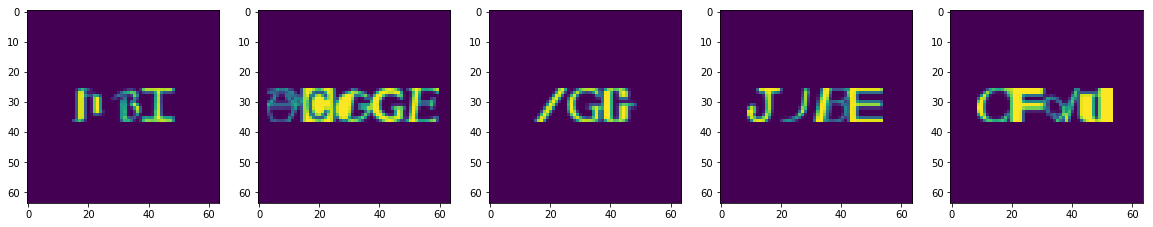

In [5]:
fig = plt.figure(figsize=(20,4))

for i in range(5):
    fig.add_subplot(151+i)
    im = data_dictionary['valid_set'][i+5]
    plt.imshow(im.reshape(64,64))

### Pickle your Synthetic Dataset

Use the predefined function in the `lib.data` module in order to pickle your data dictionary for later use.

In [2]:
for i in [1,2,3]:
    if i == 1:
        continue
    print(i)

2
3


In [6]:
pickle_data_dictionary(data_dictionary, 'data/notMNIST_concat.pickle')

('Compressed pickle size:', 1895481144)
